In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import json 
data=[]
for line in  open(r"C:\Users\siris\Downloads\reviews_Amazon_Instant_Video_5\Amazon_Instant_Video_5.json") : 
    data.append(json.loads(line))
df = pd.DataFrame(data)
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009"


In [2]:
print(len(df.isna()),len(df)) 

37126 37126


In [3]:
df.overall.value_counts()

5.0    20890
4.0     8446
3.0     4187
2.0     1885
1.0     1718
Name: overall, dtype: int64

C:\Users\siris\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='overall', ylabel='count'>

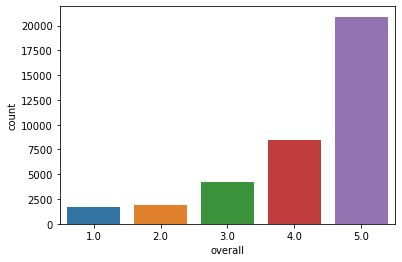

In [4]:
sns.countplot(df['overall'])

In [5]:
df['summary']

0                               A little bit boring for me
1                                    Excellent Grown Up TV
2                                    Way too boring for me
3                              Robson Green is mesmerizing
4                           Robson green and great writing
                               ...                        
37121                                        Great Series!
37122    Forget the Vampire Diaries -- This is a REAL V...
37123    It's only the first episode so I'm not real su...
37124    and that is good. The accents are a bit much h...
37125                    I may have paid towatch the pilot
Name: summary, Length: 37126, dtype: object

In [6]:
import re
reviews=[]
lemma = WordNetLemmatizer()
for i in range(len(df)):
    sentences=df.summary[i].lower()
    sentences = re.sub('[^a-zA-Z]',' ',sentences)
    words=nltk.word_tokenize(sentences)
    words = [lemma.lemmatize(words[j]) for j in range(len(words)) if not words[j] in stopwords.words('english')]
    words=' '.join(words)
    reviews.append(words)

In [7]:
reviews[0]

'little bit boring'

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [9]:
score=[]
for i in range(len(reviews)):
    score.append(sentiment.polarity_scores(reviews[i]))
score=pd.DataFrame(score)
score.head()

,neg,neu,pos,compound
0,0.503,0.497,0.000,-0.2551
1,0.000,0.351,0.649,0.5719
2,0.697,0.303,0.000,-0.3182
3,0.000,1.000,0.000,0.0000
4,0.000,0.423,0.577,0.6249


In [10]:
df = pd.concat([df,score],axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,neg,neu,pos,compound
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014",0.503,0.497,0.000,-0.2551
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012",0.000,0.351,0.649,0.5719
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013",0.697,0.303,0.000,-0.3182
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013",0.000,1.000,0.000,0.0000
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009",0.000,0.423,0.577,0.6249


In [11]:
type=[]
positive_review=''
negative_review=''
for i in range(len(df)):
    if(df.compound[i]>0):
        type.append('positive')
        positive_review=positive_review + df.summary[i];
    elif(df.compound[i]<0):
        type.append('negative')
        negative_review=negative_review + df.summary[i]; 
    else:
        type.append('neutral')
type=pd.DataFrame(type,)
type.head()

,0
0,negative
1,positive
2,negative
3,neutral
4,positive


In [12]:
df=pd.concat([df,type],axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,neg,neu,pos,compound,0
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014",0.503,0.497,0.000,-0.2551,negative
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012",0.000,0.351,0.649,0.5719,positive
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013",0.697,0.303,0.000,-0.3182,negative
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013",0.000,1.000,0.000,0.0000,neutral
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009",0.000,0.423,0.577,0.6249,positive


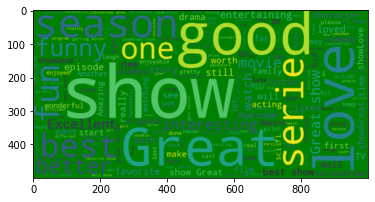

In [13]:
from wordcloud import WordCloud
w = WordCloud(background_color='green',width=1000,height=500)
w.generate(positive_review)
plt.imshow(w, interpolation="bilinear")
plt.show()

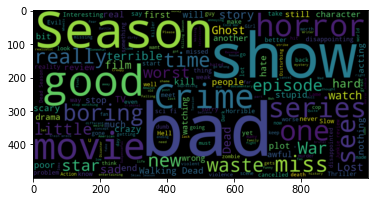

In [14]:
w2 = WordCloud(background_color='black',width=1000,height=500)
w2.generate(negative_review)
plt.imshow(w2, interpolation="bilinear")
plt.show()

<AxesSubplot:xlabel='overall', ylabel='count'>

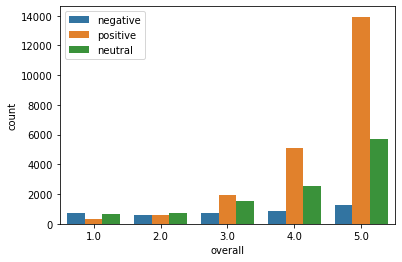

In [17]:
sns.countplot(x='overall',hue=0,data=df)